# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,0.394940,1.935899,-0.359235,1.822466,-0.054693,0.857551,-0.053336,0.529098,0.159752,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,-1.159036,0.719861,0.622591,-0.157846,-0.373298,-0.515740,-0.117206,-0.569763,0.644970,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,-0.703073,0.588971,-0.146823,-0.181353,-0.690156,-0.028327,0.410035,-0.828869,-0.885471,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,1.136838,0.648191,-0.468076,1.016010,0.206836,-0.138604,-0.066788,0.459306,0.663398,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,-1.352709,-0.995678,-0.887039,0.732821,-0.557246,-2.412225,0.200509,0.823963,-0.531789,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [ ]:
# target변수인 Class의 경우 범주형 변수로 변환시켜 주었다.

In [3]:
data["Class"] = pd.Series(data["Class"], dtype = "category")

In [4]:

features = data.iloc[:, :-1]
target = data.iloc[:, -1]

In [5]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.007183,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.827420,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-4.619034,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.459073,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,0.002111,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.467781,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,5.228342,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133


In [ ]:
# scaling 이 필요. minmax scaler 이용

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

s_features = pd.DataFrame(scaler.fit_transform(features), columns= features.columns)

In [7]:
s_features.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,0.926714,0.663520,0.882983,0.320081,0.561078,0.493178,0.530233,0.662568,0.622611,0.614594,...,0.469792,0.449133,0.441133,0.515181,0.791764,0.407605,0.727596,0.417730,0.399891,0.391878
std,0.061651,0.025396,0.049986,0.084752,0.019811,0.030124,0.018608,0.023017,0.052632,0.031600,...,0.084024,0.015125,0.017411,0.042870,0.012821,0.090510,0.056160,0.090197,0.021400,0.012088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.899356,0.653636,0.858708,0.269722,0.552003,0.476073,0.523619,0.658989,0.592752,0.601923,...,0.422444,0.444675,0.436287,0.483957,0.788400,0.354327,0.693265,0.356851,0.396037,0.389689
50%,0.927791,0.663861,0.889427,0.317440,0.560728,0.487149,0.531347,0.662845,0.620914,0.613176,...,0.469277,0.447760,0.440330,0.515643,0.791626,0.413741,0.729955,0.407385,0.399950,0.392267
75%,0.967164,0.675357,0.913573,0.362089,0.569699,0.502188,0.538041,0.668026,0.651582,0.627254,...,0.516566,0.451833,0.444710,0.545734,0.795039,0.473317,0.766055,0.462745,0.404779,0.395030
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Class', ylabel='count'>

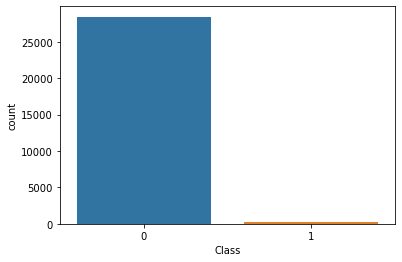

In [8]:
sns.countplot(target)

In [ ]:
# 심한 불균형

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(s_features, target, test_size=0.2, random_state = 11, stratify = target)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22942, 28) (5736, 28) (22942,) (5736,)


logistic regression

In [12]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [13]:
y_pred = model.predict(X_test) 
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
pred_proba = model.predict_proba(X_test)[:, -1].reshape(-1,1)

In [15]:
from sklearn.metrics import *

In [16]:
f1_score(y_pred, y_test)

0.7407407407407408

In [17]:
#classification report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5704
           1       0.61      0.94      0.74        32

    accuracy                           1.00      5736
   macro avg       0.81      0.97      0.87      5736
weighted avg       1.00      1.00      1.00      5736



confusion matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

p = fn + tp
n = tn + fp

Accuracy(정확도) : 전체 데이터중에서 맞게 분류된 데이터의 비율

In [ ]:
accuracy = (tp + tn) / (p + n)
print("Accuracy : ", accuracy

Error Rate(오류율) : 전체 데이터 중에서 잘못 분류한 값의 비율

In [ ]:
errorRate = (fn + fp) / (p+n)
print("Error Rate : ", errorRate

Recall(Sensitivity : 재현율) : 원래 positive 데이터에서 positive 로 분류된 수

In [ ]:
recall = (tp) / p
print("Recall : ", recall)

Precision(정밀도) : Positive 로 예측한 데이터 중에 실제 positive 인 비율

In [ ]:
precision = tp/ (tp + fp)
print("precision : ", precision)

Specificity(특이도) : negative로 판단한 내용 중에 실제 negative 인 비율

In [ ]:
specificity =  tn / (tn + fp)
print("specificity : ", specificity)

False Positive Rate (위양성률) : Negative 로 판단한 값 중에 잘못 판단한 비율(실제로는 positive)

In [ ]:
fpr = fp / n
print("FPR : ", fpr) 

f1_score : Recall과 Precision의 조화평균

In [ ]:
f1 = f1_score(y_pred, y_test)
print("f1 : ", f1)

ROC 커브 : ROC 커브는 모델의 임계값을 조정

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

AUC : AUC는 ROC 곡선 아래의 너비로, 1에 가까울 수록 좋은 모델

In [ ]:
from sklearn.metrics import auc
print("auc : ", auc(fpr, tpr))